data extracted from play store of BOA daily installation count analysis


In [19]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:


# Configure your database connection
db_host = 'localhost'
db_port = '5432'
db_name = 'tickvah_banks_ads'
db_user = 'postgres'
db_password = 'ocho'

# Create the database URL
db_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Create the SQLAlchemy engine
engine = create_engine(db_url)

# Load the CSV file into a DataFrame
app_filepath = '../data/installations.csv'
install_count = pd.read_csv(app_filepath)

# Write the DataFrame to a new table in the PostgreSQL database
install_count .to_sql('bOA_install_count', engine, if_exists='replace', index=False)

print("Data saved successfully.")

Data saved successfully.


In [29]:
def load_data(engine):
    # Load data from each table
    #Boa_data = pd.read_sql('SELECT * FROM bank_ads', engine)
    install_count = pd.read_sql('SELECT * FROM  bOA_install_count', engine)
    return  install_count

In [22]:

print( install_count.head)


<bound method NDFrame.head of             date  installation_count
0     2017-01-01              397581
1     2017-01-02              397581
2     2017-01-03              397581
3     2017-01-04              397581
4     2017-01-05              397581
...          ...                 ...
2698  2024-05-22              397581
2699  2024-05-23              397581
2700  2024-05-24              397581
2701  2024-05-25              397581
2702  2024-05-26              397581

[2703 rows x 2 columns]>


In [23]:
 # Ensure the 'date' column is in datetime format
def data_show(install_count ):
  install_count ['date'] = pd.to_datetime(install_count ['date']) 
 
  install_count ['Month'] = install_count ['date'].dt.month
  install_count ['Year'] = install_count ['date'].dt.year
  print(install_count.head())
data_show(install_count)

        date  installation_count  Month  Year
0 2017-01-01              397581      1  2017
1 2017-01-02              397581      1  2017
2 2017-01-03              397581      1  2017
3 2017-01-04              397581      1  2017
4 2017-01-05              397581      1  2017


In [13]:
 # Plot the installation count over time
def date_installed(install_count ):
  plt.figure(figsize=(14, 7))
  sns.lineplot(data=install_count , x='Year', y='installation_count', marker='o')
  plt.title('Installation Count Over Time')
  plt.xlabel('Date')
  plt.ylabel('Installation Count')
  plt.grid(True)
  plt.show()

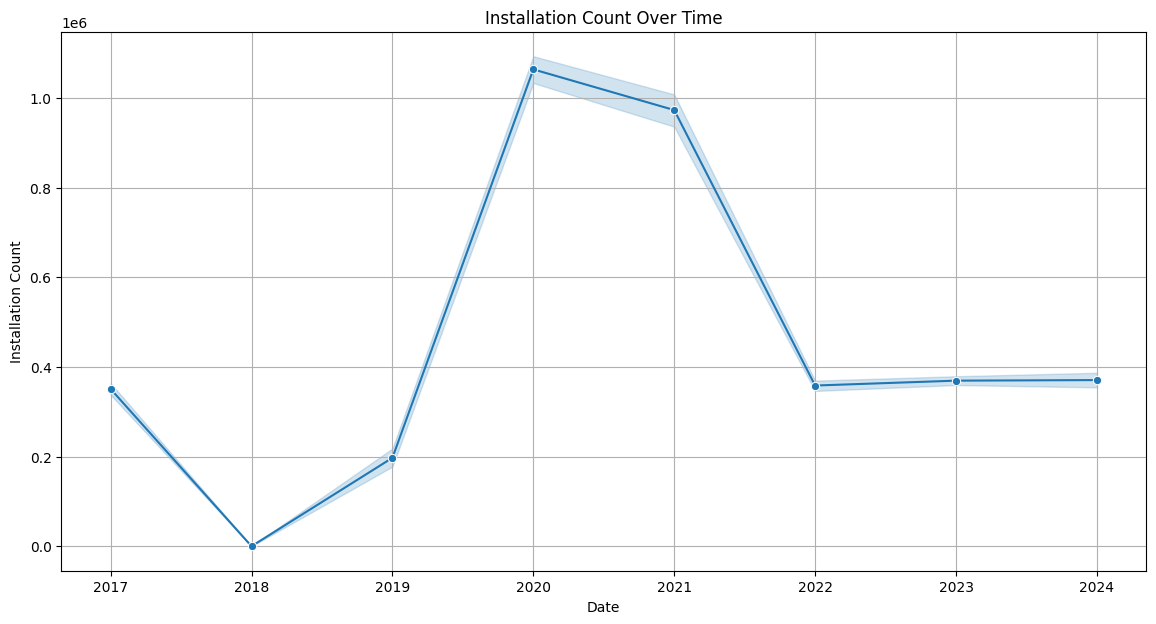

In [14]:
date_installed(install_count )